In [2]:
import pandas as pd
import sqlite3

## Connect to sqlite database with players data

In [3]:
cnx = sqlite3.connect('Database/fpa-database-fix.db')

df_players = pd.read_sql_query("SELECT * FROM players_transfermarkt", cnx)
print(df_players)

        id       player_name  current_value  \
0        1  Thibaut Courtois       35000000   
1        2     Asmir Begovic       12000000   
2        3    Jamal Blackman         250000   
3        4      Marco Amelia         250000   
4        5        Kurt Zouma       17000000   
...    ...               ...            ...   
4378  4379  Robert Snodgrass        2000000   
4379  4380      Karlan Grant        9000000   
4380  4381   Callum Robinson        6000000   
4381  4382      Mbaye Diagne        3000000   
4382  4383   Hal Robson-Kanu        1800000   

                                          url  current_club_id  season  \
0     /thibaut-courtois/profil/spieler/108390                1    2015   
1         /asmir-begovic/profil/spieler/33873                1    2015   
2       /jamal-blackman/profil/spieler/128898                1    2015   
3          /marco-amelia/profil/spieler/16810                1    2015   
4           /kurt-zouma/profil/spieler/157509                1   

In [4]:
# Lista pozycji
positions = df_players.player_position.unique()
positions

AttributeError: 'DataFrame' object has no attribute 'player_position'

In [ ]:
df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# if (cnx): cnx.close()

print(df_players_best_players_for_position)

### Joining data from Fantasy Premier League

In [5]:
players_with_values = pd.read_sql_query("SELECT * from players as p " + \
                                        "JOIN players_transfermarkt_fpl as ptf on ptf.player_id_fpl = p.guid " + \
                                        "JOIN players_transfermarkt_singles as pts on pts.id = ptf.player_id_transfermarkt " +
                                        "JOIN player_statistics as ps on ps.guid = p.guid " +
                                        "JOIN player_values as pv on pv.transfermarkt_player_id = pts.id " +
                                        "WHERE strftime('%Y',pv.date_stamp) = ps.year", cnx)

In [6]:
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,first_name,second_name,id,...,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url
0,Carl,Stewart,621,576,909,621,Carl Stewart,Carl,Stewart,909,...,0.0,2016,NaN,None,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153
1,Harry,Maguire,152,603,939,152,Harry Maguire,Harry,Maguire,939,...,0.8,2016,NaN,None,42,939,2016-04-20 00:00:00,250000,Bolton Wanderers,/rob-holding/profil/spieler/253341
2,David,Meyler,160,620,958,160,David Meyler,David,Meyler,958,...,0.2,2016,NaN,None,90,958,2016-04-20 00:00:00,750000,Ipswich Town,/ainsley-maitland-niles/profil/spieler/285845
3,Divock,Origi,216,135,206,216,Divock Origi,Divock,Origi,206,...,0.3,2018,50.0,None,135,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368
4,Nathan,Ake,35,6,8,35,Nathan Aké,Nathan,Ake,8,...,2.4,2020,54.0,DEF,174,8,2020-04-08 00:00:00,28000000,AFC Bournemouth,/nathan-ake/profil/spieler/177476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0.1,2018,47.0,None,29059,928,2018-05-02 00:00:00,4000000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455
3651,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0.1,2018,47.0,None,29060,928,2018-12-15 00:00:00,3500000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455
3652,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0.0,2020,43.0,DEF,29063,928,2020-04-08 00:00:00,2800000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455
3653,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0.0,2020,43.0,DEF,29064,928,2020-08-25 00:00:00,3500000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455


In [ ]:
players_with_values.columns

### Cleaning data 

#### Remove unnecessary data

In [7]:
players_with_values = players_with_values.dropna(axis=1)

In [8]:
players_with_values.columns
#players_with_values.drop(['transfermarkt_player_id', 'id', 'first_name', 'last_name'], 1, inplace=True)
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,first_name,second_name,id,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url
0,Carl,Stewart,621,576,909,621,Carl Stewart,Carl,Stewart,909,...,0,0,0.0,2016,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153
1,Harry,Maguire,152,603,939,152,Harry Maguire,Harry,Maguire,939,...,0,5,0.8,2016,42,939,2016-04-20 00:00:00,250000,Bolton Wanderers,/rob-holding/profil/spieler/253341
2,David,Meyler,160,620,958,160,David Meyler,David,Meyler,958,...,0,2,0.2,2016,90,958,2016-04-20 00:00:00,750000,Ipswich Town,/ainsley-maitland-niles/profil/spieler/285845
3,Divock,Origi,216,135,206,216,Divock Origi,Divock,Origi,206,...,0,0,0.3,2018,135,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368
4,Nathan,Ake,35,6,8,35,Nathan Aké,Nathan,Ake,8,...,0,4,2.4,2020,174,8,2020-04-08 00:00:00,28000000,AFC Bournemouth,/nathan-ake/profil/spieler/177476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,2,0.1,2018,29059,928,2018-05-02 00:00:00,4000000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455
3651,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,2,0.1,2018,29060,928,2018-12-15 00:00:00,3500000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455
3652,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,0,0.0,2020,29063,928,2020-04-08 00:00:00,2800000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455
3653,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,0,0.0,2020,29064,928,2020-08-25 00:00:00,3500000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455


#### Compute age of players

In [9]:
get_age = lambda x: (x['year'])  - int((x["date_of_birth"].split(" ")[0].split('-')[0]))
players_with_values["age"] = players_with_values.apply(get_age, axis=1)
players_with_values

<ipython-input-9-8a09347c086f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_with_values["age"] = players_with_values.apply(get_age, axis=1)


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,first_name,second_name,id,...,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
0,Carl,Stewart,621,576,909,621,Carl Stewart,Carl,Stewart,909,...,0,0.0,2016,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153,19
1,Harry,Maguire,152,603,939,152,Harry Maguire,Harry,Maguire,939,...,5,0.8,2016,42,939,2016-04-20 00:00:00,250000,Bolton Wanderers,/rob-holding/profil/spieler/253341,23
2,David,Meyler,160,620,958,160,David Meyler,David,Meyler,958,...,2,0.2,2016,90,958,2016-04-20 00:00:00,750000,Ipswich Town,/ainsley-maitland-niles/profil/spieler/285845,27
3,Divock,Origi,216,135,206,216,Divock Origi,Divock,Origi,206,...,0,0.3,2018,135,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23
4,Nathan,Ake,35,6,8,35,Nathan Aké,Nathan,Ake,8,...,4,2.4,2020,174,8,2020-04-08 00:00:00,28000000,AFC Bournemouth,/nathan-ake/profil/spieler/177476,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,2,0.1,2018,29059,928,2018-05-02 00:00:00,4000000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455,24
3651,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,2,0.1,2018,29060,928,2018-12-15 00:00:00,3500000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455,24
3652,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,0.0,2020,29063,928,2020-04-08 00:00:00,2800000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455,26
3653,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie,Mawson,928,...,0,0.0,2020,29064,928,2020-08-25 00:00:00,3500000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455,26


#### Remove players whose value is too small

In [10]:
indexes = players_with_values[players_with_values['player_value'] < 10000].index 
players_with_values.drop(index=indexes, inplace=True)

c:\users\kbien\.virtualenvs\football-progres-analysis-nfnrtldz\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Remove duplicated columns

In [11]:
players_with_values = players_with_values.loc[:,~players_with_values.columns.duplicated()]
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
0,Carl,Stewart,621,576,909,621,Carl Stewart,Carl Stewart,1997-05-02 00:00:00,Central Midfield,...,0,0,0.0,2016,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153,19
1,Harry,Maguire,152,603,939,152,Harry Maguire,Harry Maguire,1993-03-05 00:00:00,Centre-Back,...,0,5,0.8,2016,939,2016-04-20 00:00:00,250000,Bolton Wanderers,/rob-holding/profil/spieler/253341,23
2,David,Meyler,160,620,958,160,David Meyler,David Meyler,1989-05-29 00:00:00,Central Midfield,...,0,2,0.2,2016,958,2016-04-20 00:00:00,750000,Ipswich Town,/ainsley-maitland-niles/profil/spieler/285845,27
3,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23
4,Nathan,Ake,35,6,8,35,Nathan Aké,Nathan Aké,1995-02-18 00:00:00,Centre-Back,...,0,4,2.4,2020,8,2020-04-08 00:00:00,28000000,AFC Bournemouth,/nathan-ake/profil/spieler/177476,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie Mawson,1994-01-19 00:00:00,Centre-Back,...,0,2,0.1,2018,928,2018-05-02 00:00:00,4000000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455,24
3651,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie Mawson,1994-01-19 00:00:00,Centre-Back,...,0,2,0.1,2018,928,2018-12-15 00:00:00,3500000,Los Angeles Galaxy,/zlatan-ibrahimovic/profil/spieler/3455,24
3652,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie Mawson,1994-01-19 00:00:00,Centre-Back,...,0,0,0.0,2020,928,2020-04-08 00:00:00,2800000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455,26
3653,Alfie,Mawson,557,593,928,557,Alfie Mawson,Alfie Mawson,1994-01-19 00:00:00,Centre-Back,...,0,0,0.0,2020,928,2020-08-25 00:00:00,3500000,AC Milan,/zlatan-ibrahimovic/profil/spieler/3455,26


### Get players by positions

In [ ]:
positions

In [12]:
forwards = players_with_values[(players_with_values['player_position'] ==  'Centre-Forward') |
                                (players_with_values['player_position'] ==  'Second Striker')]

wingers = players_with_values[(players_with_values['player_position'] ==  'Left Winger') |
                              (players_with_values['player_position'] ==  'Right Winger')]

midfielders = players_with_values[(players_with_values['player_position'] ==  'Attacking Midfield') |
                                  (players_with_values['player_position'] ==  'Defensive Midfield') |
                                  (players_with_values['player_position'] ==  'Central Midfield') |
                                  (players_with_values['player_position'] ==  'Left Midfield') |
                                  (players_with_values['player_position'] ==  'Right Midfield')
                                 ]

center_defenders = players_with_values[(players_with_values['player_position'] ==  'Centre-Back') 
                                      ]

back_defenders = players_with_values[(players_with_values['player_position'] ==  'Left-Back') |
                                     (players_with_values['player_position'] ==  'Right-Back')
                                      ]

goalkeepers = players_with_values[(players_with_values['player_position'] ==  'Goalkeeper')]

In [13]:
try:
    print(len(back_defenders) + len(center_defenders) + len(midfielders) + len(wingers) + len(forwards) + len(goalkeepers))
    print(len(players_with_values))
    assert len(players_with_values) == len(back_defenders) + len(center_defenders) + len(midfielders) + len(wingers) + len(forwards) + len(goalkeepers)
except AssertionError:
    print('Thera are players not choosen to any postion category')                                                                                                                   

3636
3636


In [ ]:
# get_minutes_for_goal = lambda x: 999 if x['goals_scored'] == 0 else int((x['minutes'])/(x['goals_scored']))
# attackers['minutes_for_goal'] = attackers.apply(get_minutes_for_goal, axis=1)

In [14]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
3,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23
10,Sergio,Aguero,238,45,75,238,Sergio Agüero,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32
16,Hal,Robson-Kanu,570,653,999,570,Hal Robson-Kanu,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,0,1,0.1,2020,999,2020-04-08 00:00:00,4500000,Oxford United,/ben-woodburn/profil/spieler/344015,31
17,Roberto,Firmino,208,131,202,208,Roberto Firmino,Roberto Firmino,1991-10-02 00:00:00,Centre-Forward,...,0,1,3.0,2020,202,2020-04-08 00:00:00,72000000,Liverpool FC,/roberto-firmino/profil/spieler/131789,29
18,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0,0.6,2020,206,2020-04-08 00:00:00,16000000,Liverpool FC,/divock-origi/profil/spieler/148368,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0,0.1,2020,539,2020-04-08 00:00:00,4800000,Sporting CP,/yannick-bolasie/profil/spieler/75471,37
3618,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0,0.1,2020,539,2020-08-17 00:00:00,4000000,Everton FC,/yannick-bolasie/profil/spieler/75471,37
3619,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0,0.1,2020,539,2020-10-13 00:00:00,3500000,Everton FC,/yannick-bolasie/profil/spieler/75471,37
3620,Yaya,Sanogo,26,76,118,26,Yaya Sanogo,Yaya Sanogo,1993-01-27 00:00:00,Centre-Forward,...,0,0,0.1,2016,118,2016-04-20 00:00:00,1500000,Charlton Athletic,/yaya-sanogo/profil/spieler/127194,23


In [ ]:
midfielders

In [ ]:
center_defenders

### Predicting football player values using regression

#### Forwards

In [19]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = forwards.corr()
forwards_corr = corr['player_value']
forwards_corr = forwards_corr.sort_values(ascending=False)
print(forwards_corr)
forwards_corr.keys()


player_value               1.000000
bps                        0.535909
influence                  0.526255
ict_index                  0.510400
assists                    0.505730
goals_scored               0.499233
total_points               0.494848
bonus                      0.491916
clean_sheets               0.482881
threat                     0.481834
creativity                 0.470135
selected_by_percent        0.419350
minutes                    0.387190
yellow_cards               0.221897
goals_conceded             0.185305
year                       0.120254
red_cards                 -0.018581
age                       -0.053852
player_id_fpl             -0.071328
guid                      -0.071328
player_id_transfermarkt   -0.222536
id                        -0.235776
Name: player_value, dtype: float64


Index(['player_value', 'bps', 'influence', 'ict_index', 'assists',
       'goals_scored', 'total_points', 'bonus', 'clean_sheets', 'threat',
       'creativity', 'selected_by_percent', 'minutes', 'yellow_cards',
       'goals_conceded', 'year', 'red_cards', 'age', 'player_id_fpl', 'guid',
       'player_id_transfermarkt', 'id'],
      dtype='object')

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
def fit_linear_regression(data, training_parameters, target):
    mlr = LinearRegression()
    data_fitted = mlr.fit(data[training_parameters], data[target])
    return data_fitted
    

In [22]:
forwards_training_parametes = ['bps', 'influence', 'goals_scored', 'ict_index', 'total_points']
target = 'player_value'
forwards_fit = fit_linear_regression(forwards, forwards_training_parametes , target)

predicted_value = forwards_fit.predict(forwards[forwards_training_parametes])
predicted_value

array([14665720.54737131,  9961746.15623184,  4001878.34371869,
       43700860.290392  ,  7098034.6215979 ,  7425255.69223463,
       27976021.28370121, 16909992.62135524, 11982802.97458123,
       18746986.71501051, 55432195.5921303 , 14870616.17517464,
       22966046.30051636, 19882345.1429767 ,  6894550.84375147,
       29551534.30588847, 16025310.81284533, 32211100.2649834 ,
       15752716.46133044,  7399851.11122433, 39772779.44667886,
       48800608.83482485, 51368502.75699365, 17112347.58608207,
       31994481.45775695, 21357598.87895424, 75742989.3171145 ,
       17597164.87409062,  7718551.83352232, 12700004.26431503,
        7930694.78275046,  9412856.54605197, 23776347.30867244,
       19365223.89667359,  7472015.79485718, 39776823.59264077,
       50797786.82321712, 15806915.92839896,  9474531.15104417,
       23581112.0111877 , 24288046.86592996, 22422535.09511417,
       20564752.71962359, 45541125.95618437, 17939148.19238997,
        5363768.44807195,  7472015.79485

In [23]:
forwards['predicted_value'] = predicted_value
forwards

<ipython-input-23-50d99a7b5910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forwards['predicted_value'] = predicted_value


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value
3,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23,1.466572e+07
10,Sergio,Aguero,238,45,75,238,Sergio Agüero,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32,9.961746e+06
16,Hal,Robson-Kanu,570,653,999,570,Hal Robson-Kanu,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,1,0.1,2020,999,2020-04-08 00:00:00,4500000,Oxford United,/ben-woodburn/profil/spieler/344015,31,4.001878e+06
17,Roberto,Firmino,208,131,202,208,Roberto Firmino,Roberto Firmino,1991-10-02 00:00:00,Centre-Forward,...,1,3.0,2020,202,2020-04-08 00:00:00,72000000,Liverpool FC,/roberto-firmino/profil/spieler/131789,29,4.370086e+07
18,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.6,2020,206,2020-04-08 00:00:00,16000000,Liverpool FC,/divock-origi/profil/spieler/148368,25,7.098035e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-04-08 00:00:00,4800000,Sporting CP,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3618,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-08-17 00:00:00,4000000,Everton FC,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3619,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-10-13 00:00:00,3500000,Everton FC,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3620,Yaya,Sanogo,26,76,118,26,Yaya Sanogo,Yaya Sanogo,1993-01-27 00:00:00,Centre-Forward,...,0,0.1,2016,118,2016-04-20 00:00:00,1500000,Charlton Athletic,/yaya-sanogo/profil/spieler/127194,23,7.718552e+06


In [24]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value
3,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23,1.466572e+07
10,Sergio,Aguero,238,45,75,238,Sergio Agüero,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32,9.961746e+06
16,Hal,Robson-Kanu,570,653,999,570,Hal Robson-Kanu,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,1,0.1,2020,999,2020-04-08 00:00:00,4500000,Oxford United,/ben-woodburn/profil/spieler/344015,31,4.001878e+06
17,Roberto,Firmino,208,131,202,208,Roberto Firmino,Roberto Firmino,1991-10-02 00:00:00,Centre-Forward,...,1,3.0,2020,202,2020-04-08 00:00:00,72000000,Liverpool FC,/roberto-firmino/profil/spieler/131789,29,4.370086e+07
18,Divock,Origi,216,135,206,216,Divock Origi,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.6,2020,206,2020-04-08 00:00:00,16000000,Liverpool FC,/divock-origi/profil/spieler/148368,25,7.098035e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-04-08 00:00:00,4800000,Sporting CP,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3618,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-08-17 00:00:00,4000000,Everton FC,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3619,Glenn,Murray,713,359,539,713,Glenn Murray,Glenn Murray,1983-09-25 00:00:00,Centre-Forward,...,0,0.1,2020,539,2020-10-13 00:00:00,3500000,Everton FC,/yannick-bolasie/profil/spieler/75471,37,7.718552e+06
3620,Yaya,Sanogo,26,76,118,26,Yaya Sanogo,Yaya Sanogo,1993-01-27 00:00:00,Centre-Forward,...,0,0.1,2016,118,2016-04-20 00:00:00,1500000,Charlton Athletic,/yaya-sanogo/profil/spieler/127194,23,7.718552e+06


In [27]:
predicted_value_diff = lambda x: (x['predicted_value']  - x['player_value'])
predicted_value_diff_percent = lambda x: ((x['predicted_value'] - x['player_value']) / (x['player_value'])) * 100

def get_predicted_value_diff(data):
    data["predicted_value_diff"] = data.apply(predicted_value_diff, axis=1)
    data["predicted_value_diff_percent"] = data.apply(predicted_value_diff_percent, axis=1)

get_predicted_value_diff(forwards)

<ipython-input-27-911ba968776e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predicted_value_diff"] = data.apply(predicted_value_diff, axis=1)
<ipython-input-27-911ba968776e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predicted_value_diff_percent"] = data.apply(predicted_value_diff_percent, axis=1)


In [28]:
forwards.sort_values('predicted_value_diff', ascending=False)

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
620,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,238,2016-02-09 00:00:00,30000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,23,7.574299e+07,4.574299e+07,152.476631
949,Danny,Ings,215,134,205,215,Danny Ings,Danny Ings,1992-07-23 00:00:00,Centre-Forward,...,2019,205,2019-06-13 00:00:00,15000000,Southampton FC,/danny-ings/profil/spieler/134294,27,5.419606e+07,3.919606e+07,261.307063
309,Danny,Ings,215,134,205,215,Danny Ings,Danny Ings,1992-07-23 00:00:00,Centre-Forward,...,2019,205,2019-12-10 00:00:00,18000000,Southampton FC,/danny-ings/profil/spieler/134294,27,5.419606e+07,3.619606e+07,201.089219
153,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,238,2016-08-01 00:00:00,40000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,23,7.574299e+07,3.574299e+07,89.357473
843,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2016,238,2016-06-01 00:00:00,40000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,23,7.574299e+07,3.574299e+07,89.357473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2019,238,2019-06-13 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,26,4.554113e+07,-1.044589e+08,-69.639249
397,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2018,238,2018-12-19 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,25,4.194154e+07,-1.080585e+08,-72.038970
1162,Harry,Kane,402,163,238,402,Harry Kane,Harry Kane,1993-07-28 00:00:00,Centre-Forward,...,2018,238,2018-05-28 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,25,4.194154e+07,-1.080585e+08,-72.038970
1509,Andi,Zeqiri,1320,1197,1805,1320,Andi Zeqiri,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,...,2020,1805,2020-10-13 00:00:00,120000000,Liverpool FC,/mohamed-salah/profil/spieler/148455,21,7.484492e+06,-1.125155e+08,-93.762923


#### Finding young forwards whose predicted price is higher than current

In [29]:
def get_player_for_given_season(players, season, max_age=None, min_age=None, max_value=None, min_value=None):
    season = (players['year'] == season)

    min_age = (players['age'] >= min_age) if min_age else True
    max_age = (players['age'] <= max_age) if max_age else True
    min_value = (players['max_value'] >= min_value) if min_value else True
    max_value = (players['max_value'] <= max_value) if max_value else True

    return players[season & min_age & max_age & min_value & max_value]

In [31]:
forwards_2020_young = get_player_for_given_season(forwards, season=2020, max_age=24)
forwards_2020_young_sorted = forwards_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
forwards_2020_young_sorted
#forwards_2020_young_sorted.drop(index=3899, inplace=True)
forwards_2020_young_sorted.iloc[0:60, :]

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
2436,Keinan,Davis,1109,403,619,1109,Keinan Davis,Keinan Davis,1998-02-13 00:00:00,Centre-Forward,...,2020,619,2020-12-10 00:00:00,100000,D6stersunds FK,/jerell-sellars/profil/spieler/243690,22,9.748429e+06,9.648429e+06,9648.428648
2435,Keinan,Davis,1109,403,619,1109,Keinan Davis,Keinan Davis,1998-02-13 00:00:00,Centre-Forward,...,2020,619,2020-08-05 00:00:00,100000,D6stersunds FK,/jerell-sellars/profil/spieler/243690,22,9.748429e+06,9.648429e+06,9648.428648
3291,Tyler,Roberts,1385,385,572,1385,Tyler Roberts,Tyler Roberts,1999-01-12 00:00:00,Second Striker,...,2020,572,2020-10-13 00:00:00,1000000,West Bromwich Albion,/sam-field/profil/spieler/387331,21,1.290824e+07,1.190824e+07,1190.824241
3290,Tyler,Roberts,1385,385,572,1385,Tyler Roberts,Tyler Roberts,1999-01-12 00:00:00,Second Striker,...,2020,572,2020-04-08 00:00:00,1000000,Charlton Athletic,/sam-field/profil/spieler/387331,21,1.290824e+07,1.190824e+07,1190.824241
2470,Edward,Nketiah,686,1262,1072,686,Eddie Nketiah,Eddie Nketiah,1999-05-30 00:00:00,Centre-Forward,...,2020,1072,2020-04-08 00:00:00,725000,Wigan Athletic,/joe-williams/profil/spieler/268185,21,9.250476e+06,8.525476e+06,1175.927709
2234,Oliver,Burke,882,781,1175,882,Oliver Burke,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,2020,1175,2020-10-15 00:00:00,600000,Rotherham United,/freddie-ladapo/profil/spieler/233998,23,7.002334e+06,6.402334e+06,1067.055642
3289,Tyler,Roberts,1385,385,572,1385,Tyler Roberts,Tyler Roberts,1999-01-12 00:00:00,Second Striker,...,2020,572,2020-02-27 00:00:00,1200000,Charlton Athletic,/sam-field/profil/spieler/387331,21,1.290824e+07,1.170824e+07,975.686867
2469,Edward,Nketiah,686,1262,1072,686,Eddie Nketiah,Eddie Nketiah,1999-05-30 00:00:00,Centre-Forward,...,2020,1072,2020-02-27 00:00:00,900000,Wigan Athletic,/joe-williams/profil/spieler/268185,21,9.250476e+06,8.350476e+06,927.830655
2471,Edward,Nketiah,686,1262,1072,686,Eddie Nketiah,Eddie Nketiah,1999-05-30 00:00:00,Centre-Forward,...,2020,1072,2020-10-15 00:00:00,1000000,Bristol City,/joe-williams/profil/spieler/268185,21,9.250476e+06,8.250476e+06,825.047589
807,Lys,Mousset,52,664,1014,52,Lys Mousset,Lys Mousset,1996-02-08 00:00:00,Centre-Forward,...,2020,1014,2020-07-30 00:00:00,750000,Tottenham Hotspur,/alfie-whiteman/profil/spieler/282823,24,4.702322e+06,3.952322e+06,526.976284


Text(0, 0.5, 'Predicted value /player value (%)')

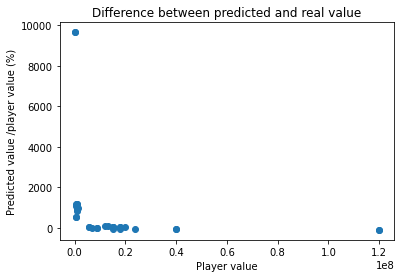

In [32]:
plt.scatter(forwards_2020_young_sorted['player_value'], forwards_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

In [33]:
forwards.guid.unique()

array([ 216,  238,  570,  208, 1292,  594,  859,   24,  266,  402,  832,
        240, 1245, 1163,  215,   25,  552,  212, 1004,  271,  120,  993,
       1101,  714,   52,  948, 1320,   47,  424,   11,  628,  984, 1054,
        830,  425,  568,  312, 1282,  492,  482,   49,  213, 1222,  185,
        463,  678,  351,  882,   66, 1042,  619,  447,  269,  373, 1109,
        354,  686,   22,  335,  121,  641, 1253,  313,  549,  310,   97,
        162,  468,   48,  635,  551,  257,  291,  336,  467,  377,  144,
        183,  184,  961, 1385,  588,   69,  833,  426,  848,  446,   50,
        534,  268,  376,  239,  556,  713,   26], dtype=int64)

In [34]:
forwards_2020_young_sorted.guid.unique()

array([1109, 1385,  686,  882,   52,  594,  240, 1004, 1163, 1292,  859,
       1320], dtype=int64)

In [35]:
def get_players_with_higher_predicted_value(data, min_precent, max_percent):
    players_with_higher_than_actual_value = dict()
    for index, row in data.iterrows():
        if row['predicted_value_diff_percent'] > min_precent and row['predicted_value_diff_percent'] < 400:
            i = row['guid']
            if i in players_with_higher_than_actual_value.keys():
                pass
            players_with_higher_than_actual_value[i] = row
            print(row['first_name'], row['second_name'], row['guid'])
    return players_with_higher_than_actual_value
                                                    

In [36]:
columns = forwards_2020_young_sorted.columns
perspective_players = get_players_with_higher_predicted_value(forwards_2020_young_sorted, 5, 400)
print(perspective_players)
perspective_players_df = pd.DataFrame(columns=columns)

for k in perspective_players.keys():
    perspective_players_df = perspective_players_df.append(perspective_players[k])

Dominic Calvert-Lewin 594
Kelechi Iheanacho 240
Dominic Calvert-Lewin 594
Dominic Calvert-Lewin 594
Kelechi Iheanacho 240
Kelechi Iheanacho 240
Kelechi Iheanacho 240
Dominic Calvert-Lewin 594
Karlan Grant 1004
Karlan Grant 1004
Karlan Grant 1004
{594: first_name                                                   Dominic
second_name                                            Calvert-Lewin
guid                                                             594
id                                                               529
player_id_transfermarkt                                          855
player_id_fpl                                                    594
player_name_transfermarkt                      Dominic Calvert-Lewin
player_name                                    Dominic Calvert-Lewin
date_of_birth                                    1997-03-16 00:00:00
player_position                                       Centre-Forward
nationality                                               

In [37]:
perspective_players_df

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name_transfermarkt,player_name,date_of_birth,player_position,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
23,Dominic,Calvert-Lewin,594,529,855,594,Dominic Calvert-Lewin,Dominic Calvert-Lewin,1997-03-16 00:00:00,Centre-Forward,...,2020,855,2020-04-08 00:00:00,20000000,Chelsea FC,/marcos-alonso/profil/spieler/112515,23,2.797602e+07,7.976021e+06,39.880106
1114,Kelechi,Iheanacho,240,47,77,240,Kelechi Iheanacho,Kelechi Iheanacho,1996-10-03 00:00:00,Centre-Forward,...,2020,77,2020-03-09 00:00:00,15000000,Leicester City,/kelechi-iheanacho/profil/spieler/295330,24,2.296605e+07,7.966046e+06,53.106975
583,Karlan,Grant,1004,980,1460,1004,Karlan Grant,Karlan Grant,1997-09-18 00:00:00,Centre-Forward,...,2020,1460,2020-02-27 00:00:00,7000000,West Bromwich Albion,/matt-phillips/profil/spieler/77274,23,7.399851e+06,3.998511e+05,5.712159


#### Finding similar players to found perspective players

In [ ]:
players_stats_2020 = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(2020), cnx)
players_stats_2020.columns
player_names = players_stats_2020.iloc[:, [0, 1, 2, -2, -1]]
player_data = players_stats_2020.iloc[:, 3:-2]
print(player_names)
print(player_data)
print(player_data.columns)

In [ ]:
from sklearn import preprocessing

x = player_data.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

In [ ]:
def get_index_for_player_guid(players, guid):
    player_id = players[(players['guid'] == guid)].index
    print(player_id)
    return player_id


from scipy.spatial import distance
def get_player_row(player_data, index):
    return player_data.iloc[index, :]

def get_distances_for_player(player_data, player):
    distances = dict()
    for index, row in player_data.iterrows():
        dist = distance.euclidean(player, row)
        distances[index] = dist
    return distances


def sort_dict_by_value(distances):
    return sorted(distances.items(), key=lambda x: x[1])

In [ ]:
def divide_dataframe(players):
    names = players.iloc[:, [0, 1, 2, -2, -1]]
    stats = players.iloc[:, 3:-2]
    return names, stats

def find_closest_players_for_player_in_season(neighbours_season, players_df, guid, n=5):
    cnx = sqlite3.connect('Database/fpa-database-fix.db')
    counter = 0
    index  = get_index_for_player_guid(players_df, guid)
        
    possible_neighbours = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(neighbours_season), cnx)
    
    possible_neighbours_names, possible_neighbours_stats = divide_dataframe(possible_neighbours)
    names, stats = divide_dataframe(players_df)
    
    
    try:
        index = index.tolist()[0]
    except:
        return dict()
    
    player_data = names.iloc[index, :]
    print(player_data)
    
    player_row = get_player_row(stats, index)
    distances = get_distances_for_player(possible_neighbours_stats, player_row)
    distances = sort_dict_by_value(distances)
    neighbours = dict()
    
    for i in range(1, len(distances)):
        ind = distances[i][0]
        player_data = (possible_neighbours_names.iloc[ind, :])
        neighbours[ind] = player_data
        counter = counter + 1 
        if counter == n:
            return neighbours

In [ ]:
def get_guid_for_player(dataframe, first_name, second_name ):
    try:
        player = players_with_values[(dataframe['first_name'] == first_name) & (dataframe['second_name'] == second_name)]
        player_guid = player['guid'].values[0]
        return player_guid
    except:
        raise PlayerNotFound()
    
class PlayerNotFound(Exception):
    pass

In [ ]:
try:
    guid = get_guid_for_player(players_with_values, 'Josh', 'Maja')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2020, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')

#### Wingers

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = wingers.corr()
wingers_corr = corr['player_value']
wingers_corr = wingers_corr.sort_values(ascending=False)
print(wingers_corr)
wingers_corr.keys()

In [ ]:
wingers_training_parametes = ['threat', 'goals_scored', 'ict_index',
       'total_points', 'influence', 'bonus']
target = 'player_value'
wingers_fit = fit_linear_regression(wingers, wingers_training_parametes , target)

predicted_value = wingers_fit.predict(wingers[wingers_training_parametes])
predicted_value

In [ ]:
wingers['predicted_value'] = predicted_value
get_predicted_value_diff(wingers)
wingers.sort_values('predicted_value_diff', ascending=False)

#### Finding perspective young wingers in current season

In [ ]:
wingers_2020_young = get_player_for_given_season(wingers, season=2020, max_age=26)
wingers_2020_young_sorted = wingers_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
wingers_2020_young_sorted.iloc[0:60, :]

In [ ]:
plt.scatter(wingers_2020_young_sorted['player_value'], wingers_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

In [ ]:
columns = wingers_2020_young_sorted.columns
perspective_wingers = get_players_with_higher_predicted_value(wingers_2020_young_sorted, 5, 800)
print(perspective_wingers)
perspective_wingers_df = pd.DataFrame(columns=columns)

for k in perspective_wingers.keys():
    perspective_wingers_df = perspective_wingers_df.append(perspective_wingers[k])

In [ ]:
perspective_wingers_df

#### Finding similar players

In [ ]:
try:
    guid = get_guid_for_player(players_with_values, 'Bukayo' , 'Saka')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2020, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')

In [ ]:
for p in closest_players.values():
    print(players_with_values[(players_with_values['guid'] == p['guid']) & (players_with_values['year'] == 2020)])

#### Midfielders

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = midfielders.corr()
midfielders_corr = corr['player_value']

midfielders_corr = midfielders_corr.sort_values(ascending=False)
print(midfielders_corr)
print(midfielders_corr.keys())

In [ ]:
midfielders_training_parametes = ['ict_index', 'assists', 'creativity',
       'selected_by_percent', 'influence', 'total_points',]
target = 'player_value'
midfielders_fit = fit_linear_regression(midfielders, midfielders_training_parametes , target)

predicted_value = midfielders_fit.predict(midfielders[midfielders_training_parametes])
predicted_value

In [ ]:
midfielders['predicted_value'] = predicted_value
get_predicted_value_diff(midfielders)
midfielders.sort_values('predicted_value_diff', ascending=False)

In [ ]:
midfielders_2020_young = get_player_for_given_season(midfielders, season=2020, max_age=26)
midfielders_2020_young = midfielders_2020_young[(midfielders_2020_young['predicted_value_diff_percent'] < 1000)]
midfielders_2020_young_sorted = midfielders_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
midfielders_2020_young_sorted.iloc[0:60, :]

In [ ]:
plt.scatter(midfielders_2020_young_sorted['player_value'], midfielders_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

#### Finding perspective midfielders in current season

In [ ]:
columns = midfielders_2020_young_sorted.columns
perspective_midfielders = get_players_with_higher_predicted_value(midfielders_2020_young_sorted, 5, 500)
perspective_midfielders_df = pd.DataFrame(columns=columns)

for k in perspective_midfielders.keys():
    perspective_midfielders_df = perspective_midfielders_df.append(perspective_midfielders[k])

In [ ]:
perspective_midfielders_df

#### Find similar players

In [ ]:
try:
    guid = get_guid_for_player(players_with_values, 'Phil' , 'Foden')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2016, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')